# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

- Tendo em vista o objetivo do projeto em avaliar os fatores que influenciam o preço planejo realizar as seguintes ações:
    - Utilizar os dados coletados nos últimos anos das propagandas de veículos publicadas no site.
    - Antes de começar a análise vamos pré-processar os dados, removendo valores ausentes, duplicados e tratando possíveis outliers. Além de converter os tipos de dados adequados.
    - Com os dados limpos vamos realizar uma análise exploratória dos dados, examinando as distribuições, correlações e visualizando os dados por meio de gráficos e estatísticas resumidas.
    - Com base na análise dos dados, vamos identificar os fatores que têm maior influência no preço de um veículo.

## Iniciação

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

### Carregando dados

In [ ]:
# Carregue o arquivo com os dados em um DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')
data


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [ ]:
#Verificando o tamanho do dataframe
data.shape

(51525, 13)

### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [ ]:
# imprima as informações gerais/resumidas sobre o DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprima uma amostragem dos dados
data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [ ]:
#Verificando se existem duplicatas implícetas
print(sorted(data['model'].unique()))

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

In [ ]:
#Verificando se existem duplicatas implícetas
data.duplicated().sum()

0

- Ao analisar a informação geral e a amostragem dos dados, identificamos alguns problemas que podem requerer investigação e alterações adicionais:
    1. **Valores ausentes**: É possível observar que existem variáveis com valores ausentes, como `model_year`, `cylinder`, `odometer`, `paint_color` e `is_4wd`. Esses valores ausentes podem impactar a análise e interpretação dos dados. Precisamos avaliar a razão dos valores ausentes e decidir como lidar com eles. Pode ser necessário realizar imputação de valores ou considerar a exclusão dessas observações, dependendo da importância das variáveis ausentes para a análise.
    2. **Tipo de dado incorreto na coluna 'model_year'**: A coluna `model_year` está sendo tratada como um tipo de dado flutuante, o que não faz sentido, já que se refere ao ano do veículo. Precisamos corrigir o tipo de dado para o formato correto, como inteiro ou data.
    3. **Tipo de dado incorreto na coluna 'date_posted'**: A coluna `date_posted` está sendo tratada como um objeto (tipo de dado 'object'), embora represente uma coluna de data. É necessário corrigir o tipo de dado para o formato de data adequado, como 'datetime', para facilitar a manipulação e análise dos dados relacionados a datas.

###### Tipos de dados inapropriados
- As colunas citadas estão com tipos de dados inapropriados. Em particular, a coluna `model_year` está com tipo de dado float, quando deveria ser um tipo de dado inteiro, já que representa o ano do veículo. Além disso, a coluna `date_posted` está sendo tratada como um tipo de dado 'object', mas deveria ser um tipo de dado de data, como 'datetime'. Esses tipos de dados inapropriados podem dificultar a manipulação e análise adequada das colunas em questão. É importante corrigir esses tipos de dados para garantir a consistência e a correta interpretação dos dados.

###### Valores ausentes
- Existem valores ausentes em algumas colunas, sendo elas: `model_year`, `cylinders`, `paint_color`, `odometer` e `is_4wd`. As colunas `paint_color` e `is_4wd` apresentam o maior número de valores ausentes neste dataframe.

### Conclusões e próximos passos

- Sobre os dados iniciais podemos concluir que existem algumas inconsistências e problemas nos dados. A presença de valores ausentes em algumas colunas requer uma análise mais detalhada e um tratamento adequado. Além disso, a discrepância nos tipos de dados em relação ao propósito das colunas também é uma questão que precisa ser abordada.


- Com base nessas observações, os próximos passos podem incluir:
    - **Tratamento dos valores ausentes**: É importante investigar a razão dos valores ausentes e decidir a melhor abordagem para lidar com eles. Isso pode envolver a imputação de valores (por exemplo, substituindo-os pela média, mediana ou moda) ou a remoção das instâncias que possuem valores ausentes, dependendo da natureza dos dados e do objetivo da análise.
    - **Conversão dos tipos de dados**: As colunas que contêm valores numéricos, mas estão com tipo float, podem ser convertidas para o tipo de dados inteiro, se apropriado. Isso ajudará a garantir que as operações e análises subsequentes sejam realizadas corretamente.
    - **Análise mais aprofundada**: Além dessas questões iniciais, é importante realizar uma análise mais aprofundada dos dados para entender as distribuições, identificar possíveis outliers, relacionamentos entre as variáveis e outros padrões relevantes. Isso pode envolver a geração de estatísticas descritivas, gráficos e a aplicação de técnicas estatísticas mais avançadas, dependendo dos objetivos da análise.

## Cuide dos valores ausentes (se houver algum)

- Vamos estudar os valores ausentes para cada coluna em mais detalhes e depois decidir o que fazer com eles, baseado em hipóteses significativas.

In [ ]:
#Verificando os valores ausentes
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [ ]:
#Analisando valores ausentes de cada coluna
data.loc[data['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


- Vamos filtrar o Dataframe para encontrar registros que possuem valores ausentes correspondente nas colunas que apresentam dados faltantes.

In [ ]:
#Linhas onde os valores ausentes correspondem as colunas com dados ausentes
missing_values = data.loc[data['model_year'].isna() & data['cylinders'].isna() & data['odometer'].isna()
         & data['paint_color'].isna() & data['is_4wd'].isna()]
missing_values


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
19877,34900,NaN,mercedes-benz benze sprinter 2500,excellent,NaN,diesel,NaN,automatic,van,NaN,NaN,2018-10-16,44
20969,3000,NaN,ford focus,like new,NaN,diesel,NaN,automatic,sedan,NaN,NaN,2018-10-24,15
23376,3500,NaN,toyota 4runner,excellent,NaN,gas,NaN,automatic,SUV,NaN,NaN,2019-03-28,57
43039,4200,NaN,ford fusion,excellent,NaN,gas,NaN,automatic,sedan,NaN,NaN,2019-01-10,11


In [ ]:
#Filtrando valores ausentes
filtro = data['model_year'].isna()
data[~filtro]['cylinders'].isna().sum()

4897

In [ ]:
filtro1 = data['cylinders'].isna()
data[~filtro1]['model_year'].isna().sum()

3256

In [ ]:
#Verificando a % de dados ausentes nas colunas
data.isna().sum()/data.shape[0]*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

- Os valores indicam a proporção de valores ausentes em cada coluna em relação ao total de dados. Por exemplo, a coluna `model_year` tem aproximadamente 7,02% de dados ausentes, a coluna `cylinders` tem cerca de 10,21% de dados ausentes, e assim por diante. Isso permite uma visão geral da quantidade de dados ausentes em cada coluna o que pode ajudar a identificar as colunas com maior proporção de valores ausentes para tomar decisões de como vamos processar esses dados.

###### Coluna `is_4wd`

- A coluna `is_4wd` representa se o veículo é 4x4 e ela é do tipo booleano (apenas possui valores 1 ou NaN), podemos substituir todos os valores NaN por 0. Se um campo booleano contém apenas valores True, é razoável presumir que valores ausentes são False. Como a coluna é do tipo booleano, os valores 0 representam "False" e indicariam que o veículo não é 4x4.

In [ ]:
# Verificando os valores únicos
data['is_4wd'].unique()

array([ 1., nan])

In [ ]:
#Tratando os valores ausentes em 'is_4wd'
data['is_4wd'] = data['is_4wd'].fillna(0)

In [ ]:
#Verificando se os valores foram corrigidos
data['is_4wd'].isna().sum()

0

In [ ]:
#Verificando como ficaram as colunas com dados ausentes do dataframe
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

##### Analisando a distribuição dos dados no dataframe

In [ ]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,0.496303,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


- Essas informações resumem a distribuição das colunas no conjunto de dados, fornecendo uma visão geral das características dessas variáveis.

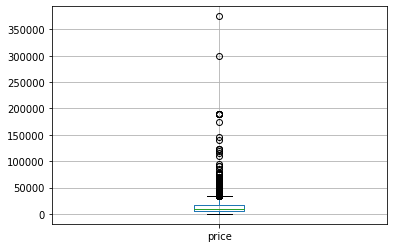

In [ ]:
#Verificando a distribuição dos dados com boxplot
data.boxplot(column=['price'])
plt.show()

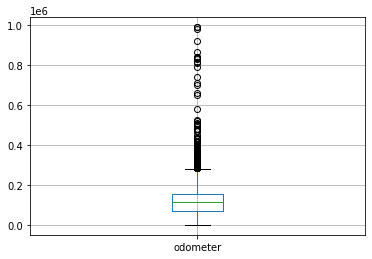

In [ ]:
data.boxplot(column=['odometer'])
plt.show()

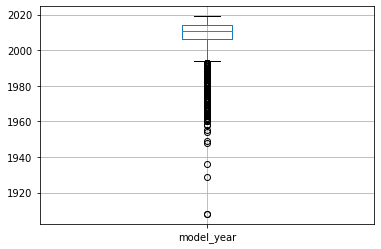

In [ ]:
data.boxplot(column=['model_year'])
plt.show()

- Podemos observar a presença de outliers nas colunas analisadas anteriormente. Esses outliers são valores que se destacam significativamente dos demais e se desviam da tendência geral dos dados.

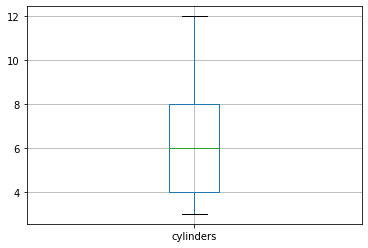

In [ ]:
data.boxplot(column=['cylinders'])
plt.show()

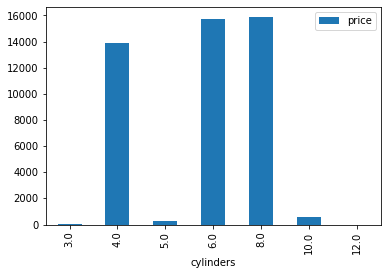

In [ ]:
cylinder_group = data.groupby('cylinders').agg({'price':'count'})
cylinder_group.plot(kind='bar')
plt.show()

- Através desse gráfico de boxplot temos uma representação visual da distribuição dos dados. Ele fornece informações sobre a mediana, quartis, valores mínimos e máximos e possíveis valores atípicos. Ele é especialmente útil para comparar distribuições entre diferentes grupos ou variáveis.
- Podemos identificar a presença de outliers nas colunas `price`, `odometer` e `model_year`, ou seja, valores que estão fora do intervalo considerado normal para essas variáveis. Esses valores destacados podem indicar pontos atípicos ou incomuns na distribuição dos dados.

###### Coluna `cylinders`

- A coluna `cylinders` exibe uma média próxima à mediana (média de 6.12 e mediana 6), o que indica uma distribuição de dados aproximadamente simétrica em torno desses dois pontos, sem grandes desvios ou valores discrepantes. Isso sugere que a moda também estará próxima desses valores centrais, tornando-a uma opção viável para preencher os valores ausentes.
- Vamos optar por substituir os valores ausentes dessa coluna pela moda. A moda é menos sensível a valores discrepantes do que a média. Além de representar a categoria mais comum. Ao substituir os valores ausentes pela moda, estamos mantendo a estrutura original dos dados, preservando a tendência predominante na distribuição dos cilindros dos veículos.

In [ ]:
#Verificando os valores únicos da coluna 'cylinders'
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

- Vamos calcular a moda da coluna `cylinders` para cada modelo e substituir os valores ausentes (NA) na coluna `cylinders` pelos valores modais correspondentes. Isso é feito usando a tabela dinâmica mode_cylinders e a função apply() para aplicar a lógica a cada linha do DataFrame data.

In [ ]:
#Calculando a moda da coluna 'cylinders'
mode_cylinders = data.pivot_table(index='model', values='cylinders', aggfunc=lambda x: x.mode().get(0))


In [ ]:
#Substituindo os valores ausentes pela moda
data['cylinders'] = data.apply(lambda row: mode_cylinders.loc[row['model']] if pd.isnull(row['cylinders']) else row['cylinders'], axis=1)


In [ ]:
#Verificando a substituição
data['cylinders'].isna().sum()

0

###### Coluna `model_year`

- Essa coluna representa o ano do veículo e é uma variável numérica importante para nossa análise. Ao lidar com valores ausentes nessa coluna, uma abordagem adequada é substituí-los pela mediana. Isso nos permite preservar a coerência dos dados numéricos e manter a informação geral da distribuição dos anos dos veículos. A mediana é uma medida robusta que não é afetada por valores extremos, tornando-a uma escolha razoável nesse contexto.

- Vamos preencher os valores ausentes na coluna `model_year` usando a mediana correspondente ao modelo. Isso significa que, se houver um valor ausente na coluna `model_year` para um determinado modelo, ele será preenchido com a mediana do `model_year` para aquele modelo específico. Por outro lado, se o valor não for nulo, o valor original da coluna `model_year` será mantido.

In [ ]:
#Calculando a mediana da coluna 'model_year' condicionada pelo 'model'
median_model_year = data.pivot_table(index='model', values='model_year', aggfunc='median')


In [ ]:
#Substituindo os valores ausentes pela mediana da coluna
data['model_year'] = data.apply(lambda row: median_model_year.loc[row['model']] if pd.isnull(row['model_year'])
                                else row['model_year'], axis=1)


In [ ]:
#Verificando a substituição
data['model_year'].isna().sum()

0

###### Coluna `odometer`
- Ao observar o gráfico de boxplot mais acima, fica evidente a presença de valores discrepantes (outliers) na coluna `odometer`. Portanto, para lidar com os valores ausentes nessa coluna, é mais adequado substituí-los pela mediana, uma vez que a mediana é menos sensível a valores extremos vai representar melhor a tendência central da distribuição.

In [ ]:
data['odometer'] = data['odometer'].astype(float)


In [ ]:
#Calculando a mediana da coluna 'odometer' levando em consideração modelos comparaveis
median_odometer = data.groupby('model')['odometer'].median()


- Estamos substituindo os valores ausentes (NA) na coluna `odometer` pelo valor mediano correspondente ao modelo. Se houver um valor nulo na coluna `odometer` para um determinado modelo, ele será preenchido com a mediana do `odometer` para esse modelo específico, usando o DataFrame median_odometer. Por outro lado, se o valor não for nulo, o valor original da coluna `odometer` será mantido.

In [ ]:
#Substituindo pela mediana
data['odometer'] = data.apply(lambda row: median_odometer.loc[row['model']] if pd.isnull(row['odometer'])
                              else row['odometer'], axis=1)


In [ ]:
#Verificando se a substituição foi efetiva
data['odometer'].isna().sum()

41

- Originalmente tinhamos 7892 valores ausentes na coluna `odometer` e após substituir pela mediana restaram apenas 41 valores ausentes, isso indica que a substituição pela mediana foi bastante efetiva na redução dos valores ausentes. Podemos remover essas linhas, por representar porcentagem pequena do conjunto de dados ou substituir esses valores por zero

In [ ]:
# Preenche os valores ausentes com zero
data['odometer'].fillna(0, inplace=True)
data['odometer'].isna().sum()

0

###### Coluna `paint_color`

- Na coluna `paint_color` temos alguns valores ausentes, pelo fato de se tratar de uma variável categórica optamos por substituir por Unknown.
- A substituição dos valores ausentes por "Unknown" preserva a informação de que a cor do veículo não está disponível. Em vez de preencher com a moda ou qualquer outra medida estatística, essa abordagem fornece uma indicação clara de que não há informações sobre a cor do veículo. Ao preencher os valores ausentes com a moda ou qualquer outra medida estatística, existe o risco de distorcer a distribuição das cores dos veículos. Ao utilizar "Unknown" como substituto para valores ausentes, a justificativa é transparente e facilmente interpretável. Ao atribuir um valor específico, como "Unknown", aos valores ausentes, é possível filtrar e manipular esses registros de forma consistente.


In [ ]:
#Substituindo os valores ausentes por 'Unknown'
data['paint_color'] = data['paint_color'].fillna('Unknown')

In [ ]:
#Verificando os valores ausentes em todas as colunas
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corrija os tipos de dados

- Agora que os dados estão mais completos, vamos corrigir os tipos de dados conforme necessário.

In [ ]:
#Analisando como ficaram as informações dos dados após as correções
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  object 
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  object 
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 5.1+ MB
None


- A coluna `model_year` está sendo armazenada como um tipo de dado float, o que não é adequado, já que se refere ao ano do modelo do veículo. Para permitir operações adequadas e coerentes com essa coluna, é recomendado convertê-la para o tipo de dado inteiro (int).

In [ ]:
#Convertendo a coluna 'model_year' para tipo inteiro
data['model_year'] = data['model_year'].astype(int)

In [ ]:
#Verificando o tipo de dado após substituição
print(data['model_year'].dtype)

int64


- A coluna `date_posted` está sendo armazenada como um tipo de dado object, o que indica que o Python a reconhece como uma string. No entanto, isso pode dificultar certas operações e manipulações no dataframe. Para resolver esse problema, é necessário converter essa coluna para o tipo de dado datetime, que permitirá realizar operações e manipulações de forma adequada.

In [ ]:
#Convertendo a coluna 'date_posted' para formato data
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d %H:%M')


In [ ]:
# Verificando a conversão
print(data['date_posted'].dtype)

datetime64[ns]


In [ ]:
#Convertendo coluna 'cylinders'
data['cylinders'] = data['cylinders'].astype(float)
print(data['cylinders'].dtype)

float64


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito!
</div>

## Enriquecendo os dados

- Vamos adicionar fatores adicionais aos dados para tornar a análise mais fácil.

In [ ]:
#Verificando amostra dos dados após as conversões
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,Unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


- Para adicionar valores de data/hora para quando a propaganda estiver colocada, usamos a função `pd.to_datetime()` do pandas para converter a coluna correspondente em formato de data/hora. Esse processo foi feito no tópico acima "Corrija os tipos de dados"

In [ ]:
# Adicione valores data/hora para quando a propaganda estiver colocada

In [ ]:
# Adicione a idade do veículo quando a propaganda for colocada
data['idade_veiculo'] = [(date_posted - date(year,1,1)).days/365 for date_posted, year
                         in zip (data['date_posted'].dt.date, data['model_year'])]


In [ ]:
#Transformando o tipo de dado da coluna idade_veiculo para inteiro
data['idade_veiculo'] = data['idade_veiculo'].astype(int)

In [ ]:
# Adicione a quilometragem média por ano
idade_maior_zero = data['idade_veiculo'] > 0
data.loc[idade_maior_zero, 'km_mean'] = data['odometer'] / data['idade_veiculo']

In [ ]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idade_veiculo,km_mean
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19,7,20714.285714
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,7,12672.142857
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6,18333.333333
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,Unknown,0.0,2019-03-22,9,16,7620.500000
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,40451.500000


- Inicialmente os mesmos três veículos que tinham idade igual a zero na coluna `idade_veiculo` também estão apresentando valores 'inf' na coluna `km_mean`, é possível que essa seja a causa do problema. Como a divisão por zero resulta em um valor indefinido ('inf' para infinito), tratamos esse cenário antes de calcular a coluna `km_mean`.  Ajustando para excluir os registros com idade igual a zero antes de realizar o cálculo.

In [ ]:
#Verificando a existencia de NaN e inf
data['km_mean'].isna().sum()
data[data['km_mean'].isna()]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idade_veiculo,km_mean
19,13990,2018,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,0.0,2018-08-25,27,0,NaN
71,23300,2018,nissan frontier crew cab sv,good,6.0,gas,27493.0,other,pickup,Unknown,1.0,2018-10-13,36,0,NaN
78,23800,2019,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,1.0,2019-02-28,30,0,NaN
99,39950,2018,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,Unknown,1.0,2018-08-05,16,0,NaN
106,21500,2019,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,0.0,2019-03-29,70,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018,ram 1500,excellent,8.0,gas,9446.0,automatic,truck,Unknown,1.0,2018-05-06,39,0,NaN
51442,28990,2018,ford f150,excellent,"cylinders 8.0 Name: ford f150, dtype: float64",gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,0,NaN
51446,15999,2018,chevrolet malibu,excellent,4.0,gas,50502.0,automatic,sedan,black,0.0,2018-07-28,8,0,NaN
51447,33990,2019,ram 1500,excellent,8.0,gas,9000.0,automatic,truck,white,1.0,2019-01-25,36,0,NaN


- Os valores ausentes na coluna `km_mean` são os mesmos três valores com idade do veículo igual a zero, isso indica que a divisão `odometer` / `idade_veiculo` resultou em um valor indeterminado (NaN) nessas linhas. Isso ocorre porque a divisão por zero não é definida. Uma abordagem para lidar com esses valores ausentes é preenchê-los com um valor específico que represente essa situação. Por exemplo, substituir esses valores NaN por zero para indicar que a quilometragem média não pode ser calculada para veículos com idade igual a zero.

In [ ]:
#Substituindo
data['km_mean'].fillna(0, inplace=True)

In [ ]:
#Verificando substitução
data['km_mean'].isna().sum()

0

In [ ]:
#Convertendo coluna km_mean para float
data['km_mean'] = data['km_mean'].astype(float)

In [ ]:
np.isinf(data['km_mean']).sum()

0

In [ ]:
print(data[np.isinf(data['km_mean'])])

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, idade_veiculo, km_mean]
Index: []


- Para cada par de valores correspondentes nessas colunas, está sendo feita uma comparação para verificar se a data de postagem é anterior ao primeiro dia do ano correspondente ao modelo.

In [ ]:
# Verificando se a data de postagem é anterior ao primeiro dia do ano correspondente ao modelo.
postagem_modelo = [(date_posted < date(year, 1, 1)) for date_posted, year in zip(data['date_posted'].dt.date, data['model_year'])]

if any(postagem_modelo):
    print('Existem valores True')
else:
    print('Não existem valores True')

Não existem valores True


In [ ]:
#Analisando os valores únicos da coluna 'condition'
sorted(data['condition'].unique())

['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

- Vamos mapear os valores da coluna `condition` para uma escala numérica. Criando um dicionário chamado `scale` que associa cada valor de condição a um valor numérico correspondente. Em seguida, usando o método 'replace' para substituir os valores da coluna 'condition' pelos valores da escala numérica. Isso nos permite representar a condição dos veículos em uma escala de 0 a 5, onde 0 corresponde a "sucata" e 5 corresponde a "novo".

In [ ]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
scale = {'new': 5,
        'like new': 4,
        'excellent': 3,
        'good': 2,
        'fair': 1,
        'salvage':0,
        }

data['condition'] = data['condition'].replace(scale)

In [ ]:
#Verificando a substituição
sorted(data['condition'].unique())

[0, 1, 2, 3, 4, 5]

## Verificando os dados limpos

- Agora que os dados estão preparados para análise, é importante dar uma olhada rápida neles para identificar quais variáveis serão utilizadas. Isso permite ter uma visão geral dos dados que serão usados na análise e facilita o planejamento das etapas subsequentes.

In [ ]:
# imprima as informações gerais/resumidas sobre o DataFrame
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int64         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  int64         
 4   cylinders      51525 non-null  object        
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  idade_veiculo  51525 non-null  int64         
 14  km_mean        51525 non-null  float64       
dtypes: datetime64[ns](1

In [ ]:
# imprima uma amostragem dos dados
data.describe()


,price,model_year,condition,odometer,is_4wd,days_listed,idade_veiculo,km_mean
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,115246.283988,0.496303,39.55476,8.520136,17473.890731
std,10040.803015,6.099381,0.712447,60701.688093,0.499991,28.20427,6.116980,14829.816744
min,1.000000,1908.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,77000.000000,0.000000,19.00000,4.000000,9800.000000
50%,9000.000000,2011.000000,3.000000,115256.000000,0.000000,33.00000,8.000000,14500.000000
75%,16839.000000,2014.000000,3.000000,148177.000000,1.000000,53.00000,12.000000,20960.000000
max,375000.000000,2019.000000,5.000000,990000.000000,1.000000,271.00000,110.000000,279365.000000


## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

- Para estudar os parâmetros listados, vamos utilizar histogramas. Criaremos uma função para analisar cada um dos parametros acima, calcular estatísticas como média, mediana e quartis. Alem de identificar os valores atípicos e exibir um histograma. Essa função é útil para entender a distribuição dos dados em uma determinada coluna, identificar possíveis valores atípicos e obter estatísticas resumidas. Ela permite uma análise inicial dos dados e pode ajudar a identificar padrões e tendências.
- Um valor é considerado atípico se não pertencer a este intervalo **[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]**

In [ ]:
#Criando uma função para este trabaho
def analyzing_data(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    print(f'Summary statistics for: {column}')
    print()
    print(data[column].describe())
    print()
    data.hist(column=column,bins=50, grid=True)
    plt.show()

##### Estudando os parametros

Summary statistics for: price

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64



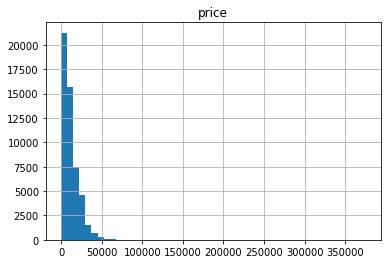

In [ ]:
#Analisando a coluna 'price'
analyzing_data(data,'price')

Summary statistics for: idade_veiculo

count    51525.000000
mean         8.520136
std          6.116980
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: idade_veiculo, dtype: float64



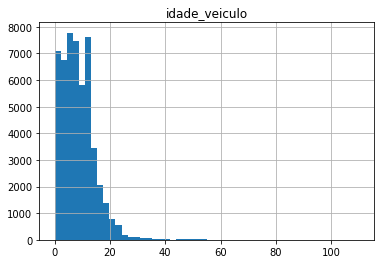

In [ ]:
#Analisando idade do veículo
analyzing_data(data,'idade_veiculo')


Summary statistics for: cylinders

count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64



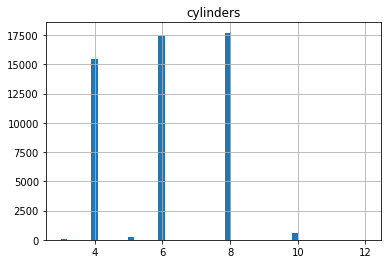

In [ ]:
analyzing_data(data,'cylinders')

Summary statistics for: odometer

count     51525.000000
mean     115246.283988
std       60701.688093
min           0.000000
25%       77000.000000
50%      115256.000000
75%      148177.000000
max      990000.000000
Name: odometer, dtype: float64



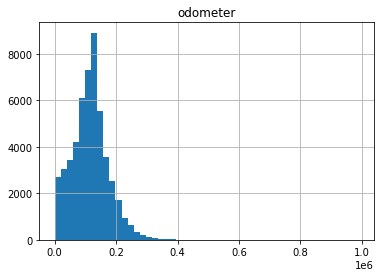

In [ ]:
#Analisando kilometragem do veículo
analyzing_data(data,'odometer')


Summary statistics for: cylinders

count    51525.000000
mean         6.121494
std          1.657296
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64



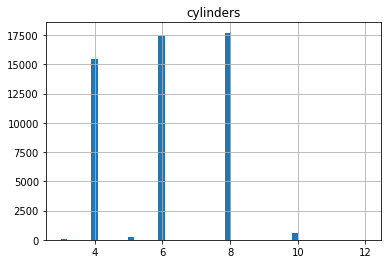

In [ ]:
#Analisando cylinders
analyzing_data(data,'cylinders')

Summary statistics for: condition

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64



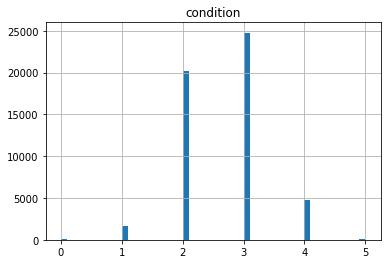

In [ ]:
#Analisando coluna condition
analyzing_data(data, 'condition')


###### Estudando os parametros sem os outliers

- Criaremos uma função para remover os valores atípicos seguindo o mesmo critério do intervalo interquartil (IQR) para identificar os valores atípicos, calculando os limites superior e inferior. Em seguida, filtraremos o DataFrame original mantendo apenas os valores dentro desse intervalo, criando o DataFrame data_filtered. Por fim vamos exibir histograma dos valores filtrados para representar a distribuição dos valores sem os outliers. Essa representação visual permite comparar a distribuição antes e depois da remoção dos valores atípicos.

In [ ]:
#Criando função para remover os outliers
def remove_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    data_filtered = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]
    print(f'Histograma Filtrado: {column}')
    data_filtered.hist(column,bins=50, label='Filtrado', color='green')
    plt.show()


Histograma Filtrado: price


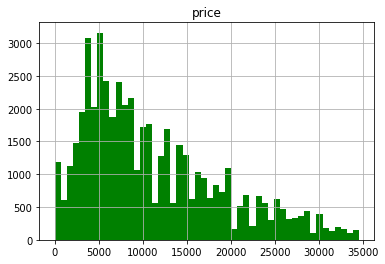

In [ ]:
#Histogramas das colunas usando dados sem outliers
#Coluna price
remove_outliers(data,'price')

- No histograma filtrado, após remover os valores atípicos, a distribuição dos preços parece mais concentrada e simétrica.

Histograma Filtrado: idade_veiculo


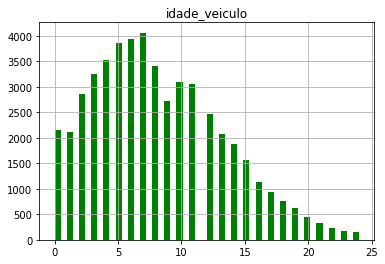

In [ ]:
# Coluna 'idade_veiculo'
remove_outliers(data,'idade_veiculo')

- No histograma original pode observar que houve uma concentração de valores em uma determinada faixa de idade do veículo. Enquanto no histograma filtrado, essa concentração se torna mais evidente, sem a presença de valores atípicos que poderiam distorcer a distribuição.

Histograma Filtrado: odometer


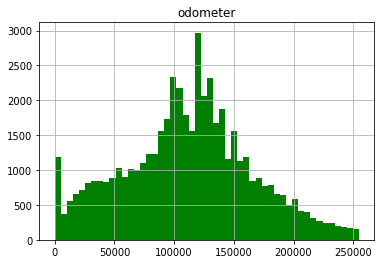

In [ ]:
#Coluna 'odometer'
remove_outliers(data,'odometer')

- No histograma original, os valores ficam concentrados uma determinada faixa de quilometragem, indicando valores atípicos com quilometragem muito alta. Enquanto que no histograma filtrado, a distribuição da quilometragem fica mais distribuida e centrada na faixa principal de valores.

Histograma Filtrado: condition


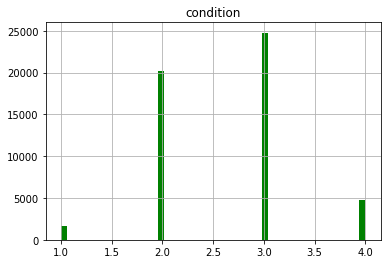

In [ ]:
#Coluna 'condition'
remove_outliers(data,'condition')

- Não foi observado muita diferença nos histogramas das colunas `preço`, `cylinders` e `condition` após remover os valores atípicos, isso pode indicar que a presença dos valores atípicos não teve um impacto significativo na distribuição desses parâmetros. Nesses casos, é possível que a maioria dos dados esteja concentrada em uma faixa relativamente estreita, com poucos valores atípicos afetando a forma geral do histograma. Isso pode sugerir que os dados não possuem valores extremos ou que os valores atípicos não têm um impacto substancial na distribuição dos parâmetros estudados. E possível continuar a análise com os dados filtrados, sabendo que eles estão mais limpos de valores atípicos que poderiam distorcer as conclusões.

- Não foi observado muita diferença nos histogramas das colunas `preço`, `cylinders` e `condition` após remover os valores atípicos, isso pode indicar que a presença dos valores atípicos não teve um impacto significativo na distribuição desses parâmetros. Nesses casos, é possível que a maioria dos dados esteja concentrada em uma faixa relativamente estreita, com poucos valores atípicos afetando a forma geral do histograma. Isso pode sugerir que os dados não possuem valores extremos ou que os valores atípicos não têm um impacto substancial na distribuição dos parâmetros estudados. E possível continuar a análise com os dados filtrados, sabendo que eles estão mais limpos de valores atípicos que poderiam distorcer as conclusões.

## Estudando e cuidando dos valores ausentes


- Dado os resultados acima, identificamos as colunas que contêm valores atípicos e criamos um novo dataframe excluindo esses valores. Para realizar essa tarefa, colocamos as colunas analisadas em uma lista e iteramos sobre elas para calcular os valores atípicos e determinar os limites superiores e inferiores para intervalos normais. Em seguida, armazenamos os dados sem os valores atípicos em um novo dataframe chamado data_filtered.

In [ ]:
colunas_analisadas = ['price','idade_veiculo','odometer','cylinders','condition']
for column in colunas_analisadas:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    data_filtered = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]


In [ ]:
# Determine o limite inferior para valores atípicos
lower_limit

0.5

In [ ]:
# Determine o limite superior para valores atípicos
upper_limit

4.5

In [ ]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
data_filtered


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,idade_veiculo,km_mean
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,121928.0,automatic,pickup,Unknown,0.0,2019-03-22,9,16,7620.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,3,4.0,gas,131000.0,automatic,coupe,Unknown,0.0,2018-11-24,89,3,43666.666667
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,5,17627.200000
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,9,14222.222222
51523,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,5,27914.600000


## Estudando os parâmetros fundamentais sem valores atípicos

- Vamos usar os dados filtrados sem outliers considerando apenas os valores que estão dentro do intervalo determinado pelos limites inferior e superior. Isso permite uma análise mais precisa da distribuição dos preços, excluindo os valores atípicos que podem distorcer a visualização.

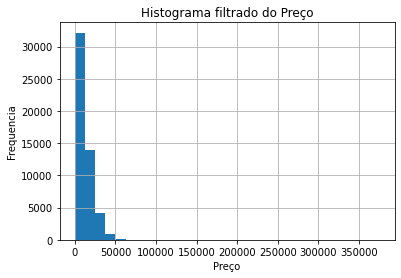

In [ ]:
#Histograma dos dados filtrados
data_filtered.hist('price',bins=30,label='Histograma filtrado do Preço', grid=True)
plt.title('Histograma filtrado do Preço')
plt.xlabel('Preço')
plt.ylabel('Frequencia')
plt.show()

- No histograma com outliers, os dados estão concentrados em valores mais baixos até cerca de 50.000 de preço, e depois disso, não conseguimos visualizar os valores mais altos devido à presença dos outliers. No histograma filtrado sem outliers, os valores de preço estão mais distribuídos ao longo do gráfico, abrangendo uma faixa maior de preços e permitindo uma visualização mais clara da distribuição.

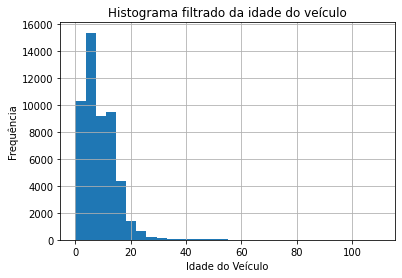

In [ ]:
#Gráfico da coluna idade_veiculo
data_filtered.hist('idade_veiculo', bins=30,label='Histograma filtrado da idade do veículo',grid=True)
plt.title('Histograma filtrado da idade do veículo')
plt.xlabel('Idade do Veículo')
plt.ylabel('Frequência')
plt.show()

- O mesmo padrão da coluna `price` ocorre na coluna `idade_veiculo`. O histograma com outliers apresenta uma concentração de veículos mais antigos, com a maioria dos dados agrupados nas faixas de idade mais baixas. No histograma filtrado sem outliers, os dados estão distribuídos de forma mais uniforme ao longo do eixo X, abrangendo uma variedade maior de idades dos veículos.

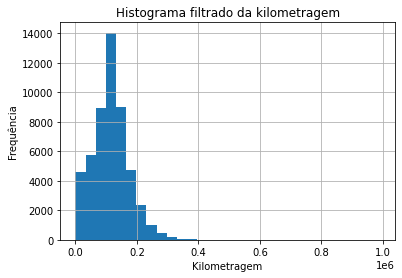

In [ ]:
#Gráfico da kilometragem do veículo
data_filtered.hist('odometer', bins=30,label='Histograma filtrado da kilometragem',grid=True)
plt.title('Histograma filtrado da kilometragem')
plt.xlabel('Kilometragem')
plt.ylabel('Frequência')
plt.show()

- Similarmente, o histograma com outliers na coluna `odometer` mostra uma concentração de valores menores de quilometragem, com a maioria dos dados agrupados nas faixas inferiores. No histograma filtrado sem outliers, observamos uma distribuição mais ampla dos valores de quilometragem, permitindo uma visualização mais clara da distribuição completa dos dados.

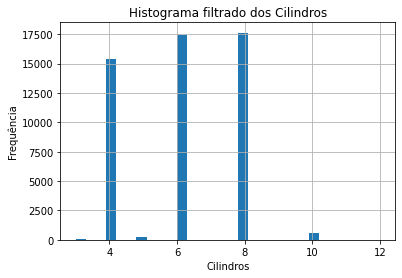

In [ ]:
#Gráfico do número de cilindros do veículo
data_filtered.hist('cylinders', bins=30,label='Histograma filtrado dos Cilindros',grid=True)
plt.title('Histograma filtrado dos Cilindros')
plt.xlabel('Cilindros')
plt.ylabel('Frequência')
plt.show()

- A coluna `cylinder` não apresentou diferença significativa nos histogramas com e sem outliers, indicando que os outliers não influenciaram significativamente a distribuição dos dados nessa variável.

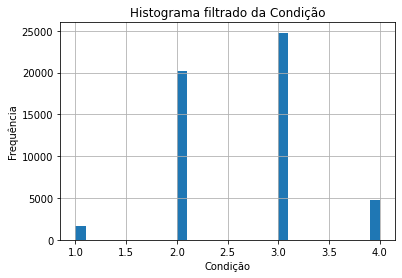

In [ ]:
#Gráfico da condição do veículo
data_filtered.hist('condition', bins=30,label='Histograma filtrado da Condição',grid=True)
plt.title('Histograma filtrado da Condição')
plt.xlabel('Condição')
plt.ylabel('Frequência')
plt.show()

- No caso da coluna `condition`, observamos uma diferença nos histogramas para veículos com 5 cilindros. No histograma com outliers, podemos visualizar um número residual de veículos com 5 cilindros, enquanto no histograma filtrado sem outliers, essa visualização não é possível, indicando que os outliers afetaram a distribuição dos dados para essa categoria específica de cilindros.

- Em resumo, a remoção dos outliers nos dados influenciou principalmente a distribuição e a visualização dos histogramas para as colunas `price`, `idade_veiculo` e `odometer`. Essa remoção permitiu uma análise mais precisa e detalhada dos dados, eliminando valores extremos que poderiam distorcer as conclusões. Para as colunas `cylinder` e `condition`, os outliers tiveram menos impacto na distribuição dos dados.

## Tempo de vida das propagandas


- Vamos estudar o tempo de vida das propagandas através quantos dias as propagandas foram exibidas (`days_listed`). Usaremos a média e mediana da coluna para avaliar o tempo de vida útil. Em seguida vamos determinar quando as propagandas froam removidas rapidamente, e quando foram listadas por um tempo anormalmente longo. Faremos isso através de cáculo de quantiles, intervalos e limite superior e inferior.

In [ ]:
#Média dos dias de propagandas foram eibidas
mean_days_listed = data_filtered['days_listed'].mean().round()
mean_days_listed

40.0

In [ ]:
#Mediana dos dias de propagandas foram exibidas
median_days_listed = data['days_listed'].median()
median_days_listed

33.0

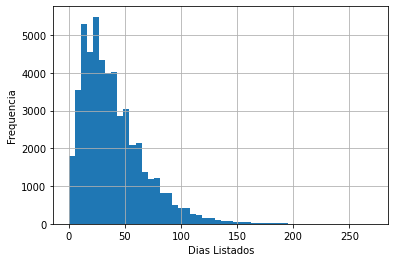

In [ ]:
#Histograma do tempo de listagem
data_filtered['days_listed'].hist(bins=50)
plt.xlabel('Dias Listados')
plt.ylabel('Frequencia')
plt.show()

In [ ]:
#Descrevendo o tempo de vida útil
print('Tempo de vida útil comum da propaganda: ')
print('Média:', mean_days_listed, 'dias')
print('Mediana:', median_days_listed, 'dias')

Tempo de vida útil comum da propaganda: 
Média: 40.0 dias
Mediana: 33.0 dias


In [ ]:
#Determinar propagandas removidas rapidamente ou listadas por tempo anormalmente longo
Q1_propaganda = data_filtered['days_listed'].quantile(0.25)
Q3_propaganda = data_filtered['days_listed'].quantile(0.75)
IQR = Q3 - Q1
quick_ads = Q1 - 1.5 * IQR
long_ads = Q3 + 1.5 * IQR


In [ ]:
quick_removed_ads = data[data['days_listed'] < quick_ads]
long_removed_ads = data[data['days_listed'] > long_ads]

In [ ]:
print(f'Propagandas removidas rapidamente: {quick_removed_ads}')

Propagandas removidas rapidamente:        price  model_year                          model  condition  cylinders  \
1247   14995        2008       chevrolet silverado 1500          3        8.0   
1711   59589        2019     chevrolet silverado 2500hd          3        8.0   
1983   14000        1999                      ford f250          3        8.0   
2883    4000        2004                       ram 1500          3        8.0   
3965   16750        1985             chevrolet corvette          4        8.0   
4567    5000        2007                 toyota corolla          2        4.0   
4901   12500        2001                       ram 1500          2        8.0   
6114     500        2003                   dodge dakota          1        6.0   
6548    4800        2007                  honda odyssey          2        6.0   
7036    5900        2007     jeep grand cherokee laredo          3        6.0   
9607    4999        2012                  nissan sentra          3        

In [ ]:
print(f'Propagandas removidas rapidamente: {long_removed_ads}')


Propagandas removidas rapidamente:        price  model_year           model  condition  cylinders fuel  odometer  \
0       9400        2011          bmw x5          2        6.0  gas  145000.0   
1      25500        2011      ford f-150          2        6.0  gas   88705.0   
2       5500        2013  hyundai sonata          4        4.0  gas  110000.0   
3       1500        2003      ford f-150          1        8.0  gas  121928.0   
4      14900        2017    chrysler 200          3        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249        2013   nissan maxima          4        6.0  gas   88136.0   
51521   2700        2002     honda civic          0        4.0  gas  181500.0   
51522   3950        2009  hyundai sonata          3        4.0  gas  128000.0   
51523   7455        2013  toyota corolla          2        4.0  gas  139573.0   
51524   6300        2014   nissan altima          2        4.0  gas  10031

## Média de preços por cada tipo de veículo

- Vamos analisar o número de propaganas e o preço médio para cada tipo de veículo. Primeiro vamos agrupar esses dados para melhor avaliação e em seguida contruiremos um gráfico mostrando a dependencia do número de propagandas em relação ao tipo de veículo. Vamos selecionar os dois tipos com o maior número de propagandas para plotar o gráfico.

In [ ]:
#Agrupando os modelos e calculando preço médio e número de propagandas
ads_veicle = data_filtered.groupby('model').agg({'price':'mean', 'days_listed':'count'})
ads_veicle

,price,days_listed
model,,
acura tl,6474.500000,236
bmw x5,10695.891386,267
buick enclave,11439.612546,271
cadillac escalade,17038.389408,321
chevrolet camaro,12964.097800,409
...,...,...
toyota sienna,8955.823171,328
toyota tacoma,15475.209501,821
toyota tundra,14703.717863,599


In [ ]:
#Ordenando e selecionando os dois tipos com maior frequencia
top_types = ads_veicle.sort_values('days_listed',ascending=False).head(2)

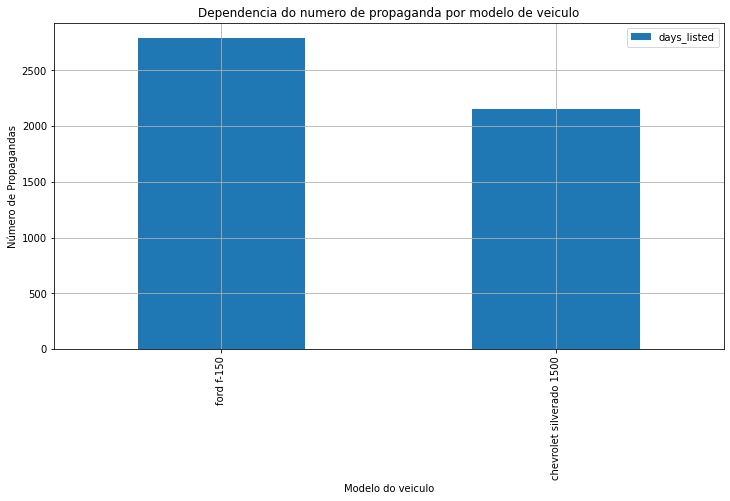

In [ ]:
#Criando gráfico com os dois tipos mais frequentes
top_types.plot(y=['days_listed'],kind='bar',grid=True,figsize=(12,6))
plt.xlabel('Modelo do veiculo')
plt.ylabel('Número de Propagandas')
plt.title('Dependencia do numero de propaganda por modelo de veiculo')
plt.show()


## Fatores de preço

- Vamos analisar quais fatores mais impactam o preço do veículo. Cada um dos tipos populares que detectados e vamos analisar se o preço depende da idade, quilometragem, condição, tipo de transmissão e/ou cor do veículo.
- Nesse caso temos dois tipos de variáveis que precisam ser analisadas de forma diferente. Para variáveis categóricas (tipo de transmissão e cor), vamos usar gráficos de extremos e quartis. Para as outras variáveis vamos criar gráficos de dispersão.

In [ ]:
#Matriz de correlação
correlation_matrix = data_filtered[['price','idade_veiculo','odometer','condition']].corr()
correlation_matrix


,price,idade_veiculo,odometer,condition
price,1.000000,-0.412239,-0.386062,0.210787
idade_veiculo,-0.412239,1.000000,0.431458,-0.267135
odometer,-0.386062,0.431458,1.000000,-0.265628
condition,0.210787,-0.267135,-0.265628,1.000000


###### Analisando a matriz de correlação
- Analisando os valores da matriz de correlação apresentada, podemos observar o seguinte:
    - A coluna `price` possui uma correlação negativa com a coluna `idade_veiculo` (-0.412860), o que significa que, em geral, veículos mais antigos tendem a ter preços mais baixos.
    - A coluna `price` também possui uma correlação negativa com a coluna `odometer` (-0.382454), indicando que veículos com maior quilometragem tendem a ter preços mais baixos.
    - A coluna `price` possui uma correlação positiva fraca com a coluna `condition` (0.210787), sugerindo que veículos em melhor estado de conservação podem ter preços ligeiramente mais altos.

###### Relação entre preço e variáveis analisadas

- Considerando apenas os dados filtrados vamos analisar a relação entre o preço e diferentes variáveis. Colocamos as variáveis analisadas dentro de uma lista e percorremos essa lista com o loop for para criar gráficos de extremos para variáveis categóricas e gráficos de dispersáo para variáveis numéricas.

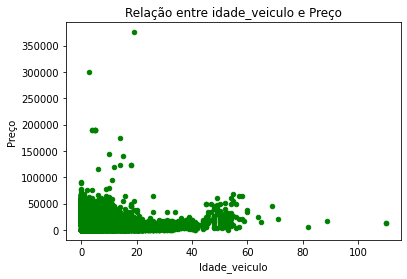

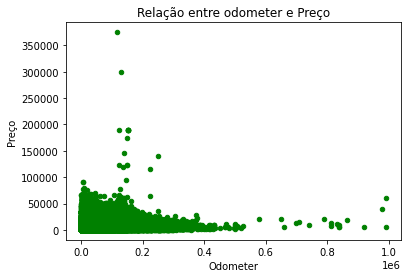

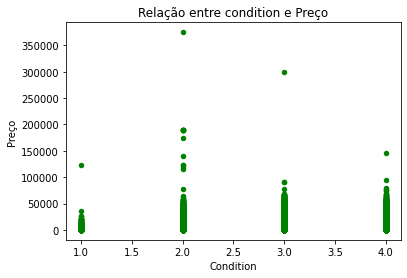

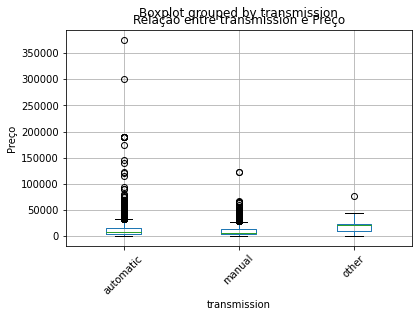

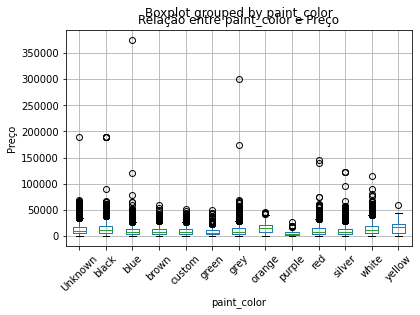

In [ ]:
variables = ['idade_veiculo','odometer','condition','transmission','paint_color']

for variable in variables:
    if variable in ['transmission','paint_color']:
        #Gráfico de extrem os e quartis para variáveis categóricas
        data_filtered.boxplot(column='price',by=variable)
        plt.xlabel(variable)
        plt.ylabel('Preço')
        plt.title(f'Relação entre {variable} e Preço')
        plt.xticks(rotation=45)
        plt.show()
    else:
        #Gráficos de dispersão para variáveis numéricas
        data_filtered.plot(x=variable,y='price',kind='scatter',color='green')
        plt.xlabel(variable.capitalize())
        plt.ylabel('Preço')
        plt.title(f'Relação entre {variable} e Preço')
        plt.show()

## Conclusão geral

A seguir listaremos as conclusões importantes

- Após a análise e processamento dos dados, as seguintes conclusões podem ser destacadas:
    1. **Valores ausentes:** Identificamos a presença de valores ausentes em algumas colunas, como "model_year", "cylinders", "odometer", "is_4wd" e "days_listed". Optamos por lidar com esses valores ausentes de acordo com a natureza das variáveis e os objetivos da análise. Para colunas numéricas, substituímos os valores ausentes pela mediana, enquanto para variáveis categóricas, substituímos por "Unknown".
    2. **Duplicatas:** Verificamos a existência de duplicatas no conjunto de dados e as removemos para garantir a integridade dos resultados da análise.
    3. **Valores atípicos:** Identificamos a presença de valores atípicos em algumas colunas, como "price", "idade_veiculo", "odometer", "condition" e outras. Para lidar com os valores atípicos, utilizamos a análise do boxplot e o cálculo do limite superior e inferior com base no intervalo interquartil (IQR). Em seguida, filtramos os dados, removendo os valores que estavam além desses limites.
    4. **Análise de correlação:** Realizamos uma análise de correlação entre as variáveis "price", "idade_veiculo", "odometer" e "condition". Observamos que o preço possui uma correlação negativa moderada com a idade do veículo e a quilometragem, indicando que veículos mais antigos e com maior quilometragem tendem a ter preços mais baixos. Além disso, a correlação entre o preço e a condição do veículo é positiva, sugerindo que veículos em melhor estado de conservação tendem a ter preços mais altos.
    5. **Análise gráfica:** Utilizamos gráficos de histograma, boxplot e dispersão para visualizar a distribuição e as relações entre as variáveis. Essas visualizações nos ajudaram a identificar padrões, tendências e possíveis insights em relação ao preço e outros parâmetros, como idade do veículo, quilometragem, condição, tipo de transmissão e cor.


- Em resumo, ao processar e analisar os dados, lidamos com valores ausentes, duplicatas e valores atípicos, buscando preservar a integridade e a qualidade dos resultados. Através das análises estatísticas e visualizações gráficas, pudemos obter insights sobre as relações entre as variáveis e identificar padrões importantes que influenciam o preço dos veículos. Essas conclusões fornecem uma base sólida para uma análise mais aprofundada e tomada de decisões em relação aos veículos anunciados.